# Part 2 - Feature Selection and Modelling.

**Project layout:**

## 1. Problem definition

In this notebook we're going through ML project with the goal of predicting the number of visitors per restaurant.

> How well can we predict the future number of visitors given it's charastristics and previous examples of how many visitors visited the restaurnats?

## 2. Data

The data is taken from Kaggle challenge. All the files in this datasets were analysed, joined to form one dataset and new featured were added ("flat file" gerenation, EDA + Feature engineering). You can find this in the R notebook in this project folder. 
Here we will split the data to train, validation and test sets. The test set will be split first and saved (before data preprocessing).

* Train - most part of the datasetvwe created.
* Validation - some of the dataframe will be split and used for validation.
* Test - some of the dataframe will be split and used for testing.



## 3. Data preprocessing

* Here we will remove TimeStamps variables since models do not work well with them (we already extracted every datetime info in the Feature Engineering).
* Categorical variables will be converted to `category`.
* Categirical variables will be turned to numerical values since most of the models do not work with "string" values.


## 4. Feature Selection

The goal of feature selection is to identify a subset of features that are most relevant to the target variable and remove irrelevant or redundant features. This can help improve model performance by reducing the dimensionality of the data, improving the model's interpretability, and reducing the risk of overfitting.

There are different approaches to feature selection, including filter methods, wrapper methods, and embedded methods. In filter methods, features are evaluated based on their statistical properties and those with the highest scores are selected. Wrapper methods evaluate subsets of features by training and evaluating the model with different combinations of features. Embedded methods incorporate feature selection into the model training process, such as regularization methods like Lasso or Ridge regression.


## 4. Dataset Partitioning


Split the data into training, validation, and test sets. This is important for evaluating the performance of the model.


## 5. Model Selection


We will choose a machine learning model from skleran exsiting regression models.



## 6. Model training


Train the machine learning model using the training set.



## 7. Model evaluation

The evaluation metric for this project is the RMSLE (root mean squared log error) between the actual and predicted visitor numbers.

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a ML model which minimizes RMSLE.

The performance of the machine learning model is Evaluated using the Validation set. This is important for tuning the hyperparameters of the model. 

The best value for Root Mean Squared Logarithmic Error (RMSLE) in a model depends on the specific problem being solved and the context in which the model is being used. In general, a lower RMSLE indicates better performance of the model, but what constitutes a "good" or "acceptable" RMSLE will vary depending on the problem and the available data.

RMSLE is commonly used as an evaluation metric for regression problems where the target variable has a wide range of values, and the relative error is more important than the absolute error. For example, in predicting housing prices, a model that is off by $100,000 for a $1,000,000 house may be considered worse than a model that is off by $10,000 for a $100,000 house, even though the absolute error is higher in the latter case. In such cases, an RMSLE of less than 0.5 may be considered good, while an RMSLE of less than 0.1 may be considered excellent.

However, it's important to keep in mind that there is no universally accepted threshold for what constitutes a "good" or "acceptable" RMSLE. The best way to determine whether a model's RMSLE is good enough is to compare it to other models on the same problem and evaluate its performance in the context of the specific problem being solved. Additionally, other evaluation metrics and qualitative analysis should be used alongside RMSLE to gain a comprehensive understanding of the model's performance.



## 8. Model testing


Finally, we will test the performance of the machine learning model using the test set. This provides an estimate of the model's performance on new, unseen data.



## 9. Model deployment

Deploy the machine learning model in a production environment. This may involve integrating the model into an existing system or creating a new system for deployment.
We won't be doing this step in this project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import date

## Import data and Parse dates:

In [3]:
df =  pd.read_csv("data/full_data_engineered.csv",
                  low_memory = False,
                 parse_dates = ["visit_date"])

In [4]:
df.visit_date.dtype

dtype('<M8[ns]')

### Sort DataFrame by visit_date

In [5]:
#sort dates in order 
df.sort_values(by = ["visit_date"], inplace = True, ascending = True)

In [6]:
df.head().T

,0,1,2,3,4
visit_date,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
air_store_id,air_877f79706adbfb06,air_877f79706adbfb06,air_db4b38ebe7a7ceff,air_db4b38ebe7a7ceff,air_db80363d35f10926
visitors,3,3,21,21,8
air_genre_name,Japanese food,Japanese food,Dining bar,Dining bar,Dining bar
air_area_name,Tōkyō-to Minato-ku Shibakōen,Tōkyō-to Minato-ku Shibakōen,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu Ōsaka-shi Shinmachi,Hokkaidō Asahikawa-shi 6 Jōdōri
prefecture,Tōkyō-to,Tōkyō-to,Ōsaka-fu,Ōsaka-fu,Hokkaidō
latitude,35.658068,35.658068,34.676231,34.676231,43.770635
longitude,139.751599,139.751599,135.486059,135.486059,142.364819
holiday_flg,1,1,1,1,1
visit_datetime,2016-01-01 20:00:00,2016-01-01 19:00:00,2016-01-01 19:00:00,2016-01-01 19:00:00,2016-01-01 19:00:00


### Let's visualise the data again before we move on to data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108439 entries, 0 to 108438
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   visit_date          108439 non-null  datetime64[ns]
 1   air_store_id        108439 non-null  object        
 2   visitors            108439 non-null  int64         
 3   air_genre_name      108439 non-null  object        
 4   air_area_name       108439 non-null  object        
 5   prefecture          108439 non-null  object        
 6   latitude            108439 non-null  float64       
 7   longitude           108439 non-null  float64       
 8   holiday_flg         108439 non-null  int64         
 9   visit_datetime      108439 non-null  object        
 10  reserve_datetime    108439 non-null  object        
 11  reserve_visitors    108439 non-null  int64         
 12  visit_month         108439 non-null  int64         
 13  visit_wday          108439 no

In [8]:
df.isna().sum()

visit_date            0
air_store_id          0
visitors              0
air_genre_name        0
air_area_name         0
prefecture            0
latitude              0
longitude             0
holiday_flg           0
visit_datetime        0
reserve_datetime      0
reserve_visitors      0
visit_month           0
visit_wday            0
visit_year            0
visit_day             0
visit_dayof_year      0
reserve_month         0
reserve_year          0
reserve_wday          0
reserve_day           0
reserve_dayof_year    0
visit_time            0
reserve_time          0
hours_diff            0
dist                  0
dist_group            0
air_count             0
dtype: int64

In [9]:
%matplotlib inline 

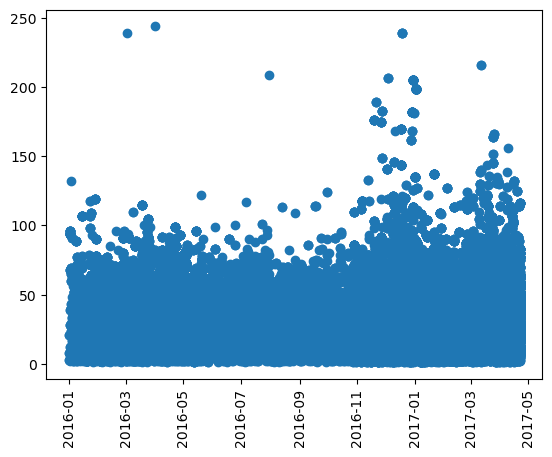

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["visit_date"], df["visitors"])
plt.xticks(rotation=90);

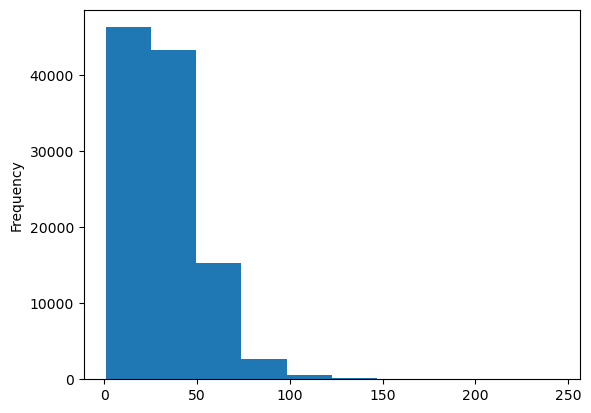

In [11]:
df.visitors.plot.hist();

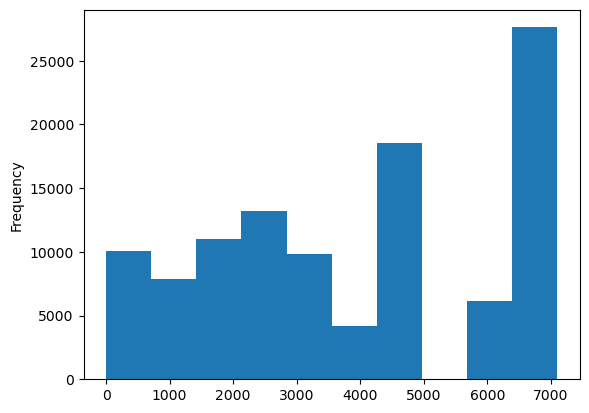

In [12]:
df.air_count.plot.hist();

<Axes: >

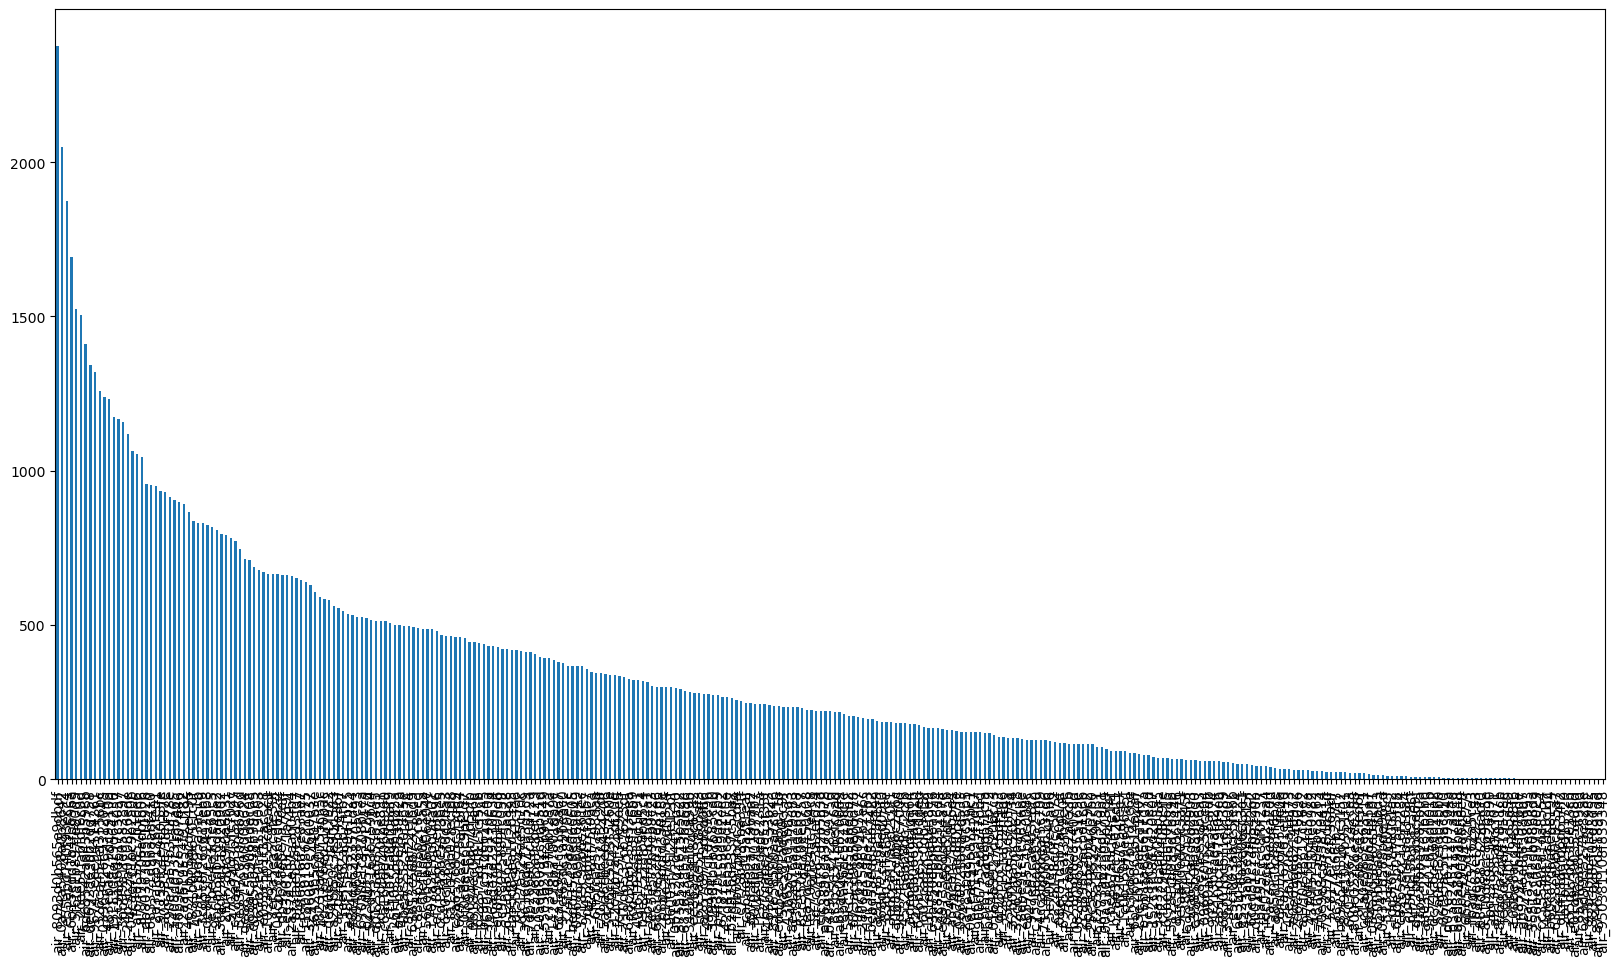

In [13]:
df["air_store_id"].value_counts().plot.bar(figsize=(20, 10))

In [14]:
#Building a correlation matrix
df.corr()

C:\Users\stein\AppData\Local\Temp\ipykernel_20600\2175196493.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,visitors,latitude,longitude,holiday_flg,reserve_visitors,visit_month,visit_year,visit_day,visit_dayof_year,reserve_month,reserve_year,reserve_wday,reserve_day,reserve_dayof_year,visit_time,reserve_time,hours_diff,dist,dist_group,air_count
visitors,1.000000,-0.003134,-0.007925,0.106165,0.189266,0.056398,-0.015027,0.067556,0.060147,0.066218,-0.023813,0.043261,0.025895,0.060147,-0.057738,0.001337,0.035623,0.010388,0.026417,0.082333
latitude,-0.003134,1.000000,0.703701,0.017182,0.003061,0.016360,0.038156,-0.001773,0.016145,0.023629,0.030556,0.009387,-0.001034,0.016145,0.079935,0.013205,0.025373,0.373397,0.288822,0.074627
longitude,-0.007925,0.703701,1.000000,-0.000559,-0.040781,-0.000127,0.029635,-0.003883,-0.000386,0.004065,0.023933,0.006412,-0.000164,-0.000386,0.048323,-0.002582,0.026302,-0.383871,-0.462221,-0.106945
holiday_flg,0.106165,0.017182,-0.000559,1.000000,-0.023006,0.111134,-0.094516,0.063057,0.114872,0.140489,-0.113879,-0.012284,0.039418,0.114872,-0.046827,-0.011347,-0.004420,0.020502,0.023546,0.017983
reserve_visitors,0.189266,0.003061,-0.040781,-0.023006,1.000000,0.022398,-0.011182,0.011125,0.022813,0.026165,-0.032413,-0.026239,-0.013946,0.022813,0.029142,0.015833,0.189473,0.058569,0.057759,-0.004289
visit_month,0.056398,0.016360,-0.000127,0.111134,0.022398,1.000000,-0.722662,0.076461,0.997755,0.944593,-0.685035,-0.016319,0.049877,0.997755,0.020672,-0.000871,-0.001181,0.020783,0.020198,0.005008
visit_year,-0.015027,0.038156,0.029635,-0.094516,-0.011182,-0.722662,1.000000,-0.095247,-0.724960,-0.671867,0.962240,0.014367,-0.055568,-0.724960,-0.002503,0.004477,0.033519,-0.000077,-0.003426,-0.015158
visit_day,0.067556,-0.001773,-0.003883,0.063057,0.011125,0.076461,-0.095247,1.000000,0.142764,0.068118,-0.060737,-0.020006,0.478132,0.142764,0.004336,-0.005920,-0.040895,0.007600,0.009810,-0.000249
visit_dayof_year,0.060147,0.016145,-0.000386,0.114872,0.022813,0.997755,-0.724960,0.142764,1.000000,0.942453,-0.685539,-0.017617,0.081573,1.000000,0.020884,-0.001207,-0.003389,0.021146,0.020702,0.004993
reserve_month,0.066218,0.023629,0.004065,0.140489,0.026165,0.944593,-0.671867,0.068118,0.942453,1.000000,-0.717538,-0.010992,0.043429,0.942453,0.021908,-0.006656,0.053662,0.020592,0.018899,0.003964


C:\Users\stein\AppData\Local\Temp\ipykernel_20600\2458752809.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


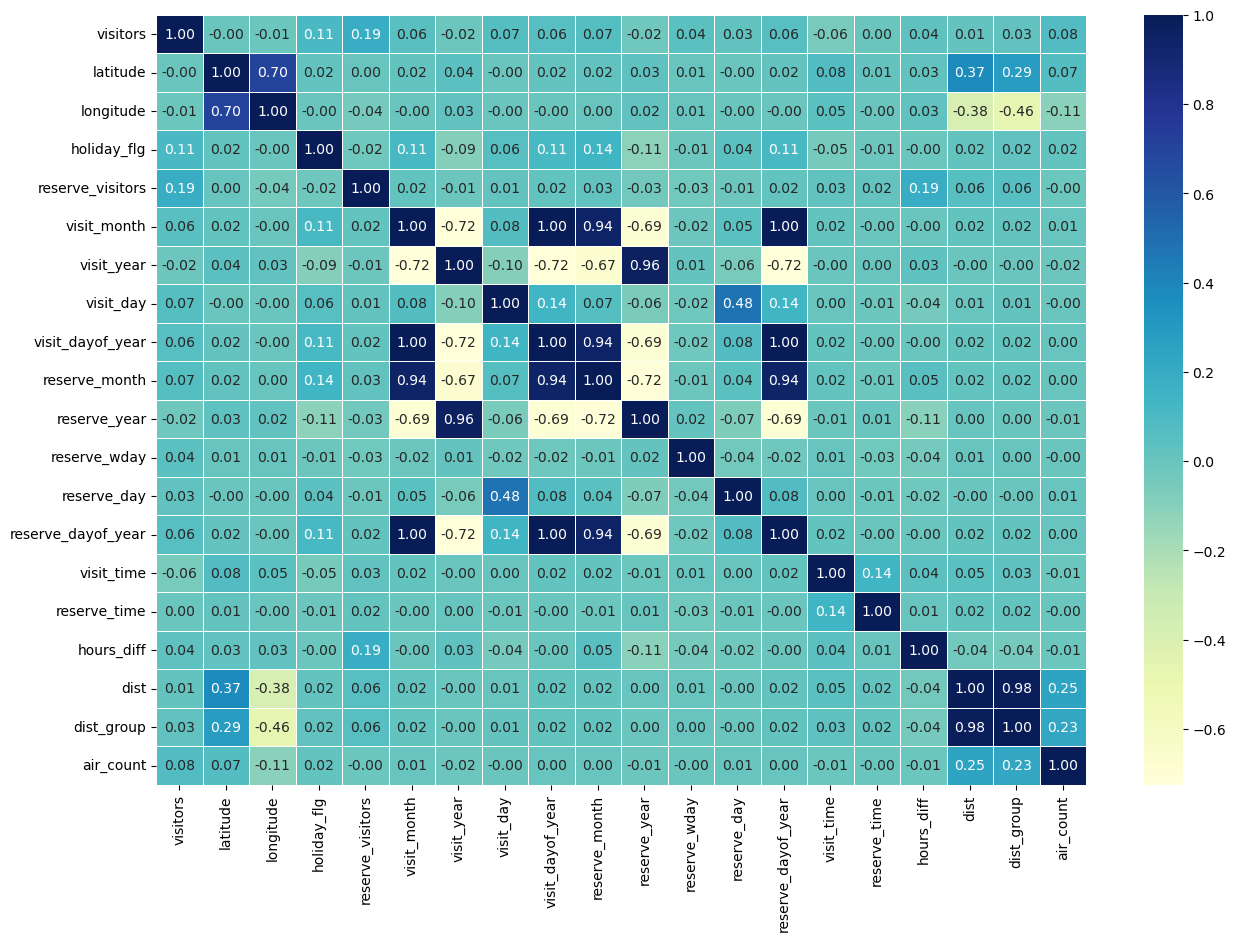

In [15]:
# lets make out corr matrix a little prettier
corr_matrix = df.corr()
fig, ax  = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                cmap = "YlGnBu")

### Make a copy of the original DF

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data. 

In [16]:
# make a copy
df_tmp = df.copy()

In [17]:
df_tmp.dtypes

visit_date            datetime64[ns]
air_store_id                  object
visitors                       int64
air_genre_name                object
air_area_name                 object
prefecture                    object
latitude                     float64
longitude                    float64
holiday_flg                    int64
visit_datetime                object
reserve_datetime              object
reserve_visitors               int64
visit_month                    int64
visit_wday                    object
visit_year                     int64
visit_day                      int64
visit_dayof_year               int64
reserve_month                  int64
reserve_year                   int64
reserve_wday                   int64
reserve_day                    int64
reserve_dayof_year             int64
visit_time                     int64
reserve_time                   int64
hours_diff                     int64
dist                         float64
dist_group                     int64
a

In [18]:
df_tmp.head()

,visit_date,air_store_id,visitors,air_genre_name,air_area_name,prefecture,latitude,longitude,holiday_flg,visit_datetime,...,reserve_year,reserve_wday,reserve_day,reserve_dayof_year,visit_time,reserve_time,hours_diff,dist,dist_group,air_count
0,2016-01-01,air_877f79706adbfb06,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,Tōkyō-to,35.658068,139.751599,1,2016-01-01 20:00:00,...,2016,6,1,1,20,16,4,64.784310,1,3438
1,2016-01-01,air_877f79706adbfb06,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,Tōkyō-to,35.658068,139.751599,1,2016-01-01 19:00:00,...,2016,6,1,1,19,16,3,64.784310,1,3438
2,2016-01-01,air_db4b38ebe7a7ceff,21,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu,34.676231,135.486059,1,2016-01-01 19:00:00,...,2016,6,1,1,19,19,0,340.089856,3,1292
3,2016-01-01,air_db4b38ebe7a7ceff,21,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu,34.676231,135.486059,1,2016-01-01 19:00:00,...,2016,6,1,1,19,19,0,340.089856,3,1292
4,2016-01-01,air_db80363d35f10926,8,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,Hokkaidō,43.770635,142.364819,1,2016-01-01 19:00:00,...,2016,6,1,1,19,15,4,949.815562,5,4937


In [19]:
df_tmp.visit_date

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
107865   2017-04-22
107866   2017-04-22
107867   2017-04-22
107856   2017-04-22
108438   2017-04-22
Name: visit_date, Length: 108439, dtype: datetime64[ns]

In [20]:
df_tmp.visit_date.value_counts()

2016-12-24    1376
2016-12-17    1106
2016-12-22    1052
2017-02-25     965
2016-12-16     959
              ... 
2016-08-22      18
2016-10-24      17
2016-10-03      15
2016-06-27      11
2016-01-01       6
Name: visit_date, Length: 478, dtype: int64

# 3. Data Preprocessing

* Here we will remove TimeStamps variables since models do not work well with them (we already extracted every datetime info in the Feature Engineering).
* Categorical variables will be converted to `category` and One-Hot Encoding. 
* Large Categorical variables (with more then 12 categories) will be transformed into numerical values.


In [21]:
#delete dates since we alreay got the date and time components
df_tmp.drop(['visit_date','reserve_datetime','visit_datetime'], axis =1, inplace = True)

In [22]:
df_tmp.T

,0,1,2,3,4,5,23,24,25,26,...,107860,107861,107862,107863,107864,107865,107866,107867,107856,108438
air_store_id,air_877f79706adbfb06,air_877f79706adbfb06,air_db4b38ebe7a7ceff,air_db4b38ebe7a7ceff,air_db80363d35f10926,air_db80363d35f10926,air_877f79706adbfb06,air_db80363d35f10926,air_db80363d35f10926,air_db80363d35f10926,...,air_56cebcbd6906e04c,air_56cebcbd6906e04c,air_56cebcbd6906e04c,air_5a9a6cbeeb434c08,air_5a9a6cbeeb434c08,air_5acc13d655a6e8b2,air_5acc13d655a6e8b2,air_5c7489c9ec755e2d,air_54d6c25d33f5260e,air_fea5dc9594450608
visitors,3,3,21,21,8,8,12,94,94,94,...,20,20,20,40,40,36,36,64,32,14
air_genre_name,Japanese food,Japanese food,Dining bar,Dining bar,Dining bar,Dining bar,Japanese food,Dining bar,Dining bar,Dining bar,...,Izakaya,Izakaya,Izakaya,Izakaya,Izakaya,Izakaya,Izakaya,Bar/Cocktail,Izakaya,Other
air_area_name,Tōkyō-to Minato-ku Shibakōen,Tōkyō-to Minato-ku Shibakōen,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu Ōsaka-shi Shinmachi,Hokkaidō Asahikawa-shi 6 Jōdōri,Hokkaidō Asahikawa-shi 6 Jōdōri,Tōkyō-to Minato-ku Shibakōen,Hokkaidō Asahikawa-shi 6 Jōdōri,Hokkaidō Asahikawa-shi 6 Jōdōri,Hokkaidō Asahikawa-shi 6 Jōdōri,...,Hyōgo-ken Kōbe-shi Kumoidōri,Hyōgo-ken Kōbe-shi Kumoidōri,Hyōgo-ken Kōbe-shi Kumoidōri,Fukuoka-ken Fukuoka-shi Daimyō,Fukuoka-ken Fukuoka-shi Daimyō,Tōkyō-to Katsushika-ku Tateishi,Tōkyō-to Katsushika-ku Tateishi,Hokkaidō Asahikawa-shi 6 Jōdōri,Fukuoka-ken Fukuoka-shi Shiobaru,Shizuoka-ken Hamamatsu-shi Motoshirochō
prefecture,Tōkyō-to,Tōkyō-to,Ōsaka-fu,Ōsaka-fu,Hokkaidō,Hokkaidō,Tōkyō-to,Hokkaidō,Hokkaidō,Hokkaidō,...,Hyōgo-ken,Hyōgo-ken,Hyōgo-ken,Fukuoka-ken,Fukuoka-ken,Tōkyō-to,Tōkyō-to,Hokkaidō,Fukuoka-ken,Shizuoka-ken
latitude,35.658068,35.658068,34.676231,34.676231,43.770635,43.770635,35.658068,43.770635,43.770635,43.770635,...,34.695124,34.695124,34.695124,33.589216,33.589216,35.743575,35.743575,43.770635,33.561569,34.710895
longitude,139.751599,139.751599,135.486059,135.486059,142.364819,142.364819,139.751599,142.364819,142.364819,142.364819,...,135.197853,135.197853,135.197853,130.392813,130.392813,139.84718,139.84718,142.364819,130.426428,137.72594
holiday_flg,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
reserve_visitors,2,1,6,3,4,5,2,2,2,4,...,2,2,3,5,5,2,2,11,37,2
visit_month,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


### Convert to categorical variables:

In [23]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108439 entries, 0 to 108438
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   air_store_id        108439 non-null  category
 1   visitors            108439 non-null  int64   
 2   air_genre_name      108439 non-null  category
 3   air_area_name       108439 non-null  category
 4   prefecture          108439 non-null  category
 5   latitude            108439 non-null  float64 
 6   longitude           108439 non-null  float64 
 7   holiday_flg         108439 non-null  int64   
 8   reserve_visitors    108439 non-null  int64   
 9   visit_month         108439 non-null  int64   
 10  visit_wday          108439 non-null  category
 11  visit_year          108439 non-null  int64   
 12  visit_day           108439 non-null  int64   
 13  visit_dayof_year    108439 non-null  int64   
 14  reserve_month       108439 non-null  int64   
 15  reserve_year     

In [25]:
df_tmp['dist_group'] = df_tmp['dist_group'].astype('category')

df_tmp['reserve_wday'] = df_tmp['reserve_wday'].astype('category')
df_tmp['reserve_year'] = df_tmp['reserve_year'].astype('category')
df_tmp['reserve_month'] = df_tmp['reserve_month'].astype('category')

df_tmp['visit_year'] = df_tmp['visit_year'].astype('category')
df_tmp['visit_wday'] = df_tmp['visit_wday'].astype('category')
df_tmp['visit_month'] = df_tmp['visit_month'].astype('category')

df_tmp['holiday_flg'] = df_tmp['holiday_flg'].astype('category')

#the categorical data that we won't turn to dummies:
df_tmp['air_count'] = df_tmp['air_count'].astype('category')
df_tmp['air_store_id'] = df_tmp['air_store_id'].astype('category')

**We are leaving day and day of year variables as integer.**

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108439 entries, 0 to 108438
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   air_store_id        108439 non-null  category
 1   visitors            108439 non-null  int64   
 2   air_genre_name      108439 non-null  category
 3   air_area_name       108439 non-null  category
 4   prefecture          108439 non-null  category
 5   latitude            108439 non-null  float64 
 6   longitude           108439 non-null  float64 
 7   holiday_flg         108439 non-null  category
 8   reserve_visitors    108439 non-null  int64   
 9   visit_month         108439 non-null  category
 10  visit_wday          108439 non-null  category
 11  visit_year          108439 non-null  category
 12  visit_day           108439 non-null  int64   
 13  visit_dayof_year    108439 non-null  int64   
 14  reserve_month       108439 non-null  category
 15  reserve_year     

In [27]:
cat_cols = list(df_tmp.select_dtypes(include=['category']).columns)
cat_cols

['air_store_id',
 'air_genre_name',
 'air_area_name',
 'prefecture',
 'holiday_flg',
 'visit_month',
 'visit_wday',
 'visit_year',
 'reserve_month',
 'reserve_year',
 'reserve_wday',
 'dist_group',
 'air_count']

### Get dummies for small Cetegorical variables

In [28]:
df_tmp = pd.get_dummies(df_tmp, columns= ['air_genre_name','prefecture','holiday_flg','visit_month','visit_wday','visit_year',
                                          'reserve_month','reserve_wday','reserve_year','dist_group'])

In [29]:
len(df_tmp.air_count.unique())

67

In [30]:
len(df_tmp.air_store_id.unique())

331

In [31]:
len(df_tmp.air_area_name.unique())

72

### Turning (large) categorical variables into numbers:
* air_count
* air_store_id
* air_area_name

In [32]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1
        df_tmp[label] = pd.Categorical(content).codes +1

In [33]:
df_tmp.head().T

,0,1,2,3,4
air_store_id,179.000000,179.000000,288.000000,288.000000,289.000000
visitors,3.000000,3.000000,21.000000,21.000000,8.000000
air_area_name,47.000000,47.000000,70.000000,70.000000,15.000000
latitude,35.658068,35.658068,34.676231,34.676231,43.770635
longitude,139.751599,139.751599,135.486059,135.486059,142.364819
...,...,...,...,...,...
dist_group_1,1.000000,1.000000,0.000000,0.000000,0.000000
dist_group_2,0.000000,0.000000,0.000000,0.000000,0.000000
dist_group_3,0.000000,0.000000,1.000000,1.000000,0.000000
dist_group_4,0.000000,0.000000,0.000000,0.000000,0.000000


### Save preprocessed data


In [34]:
# Export current df_train
df_tmp.to_csv("data/preproc_data.csv", index = False)

In [35]:
del df_tmp

In [36]:
# import preprocessed data 
data = pd.read_csv("data/preproc_data.csv", low_memory = False)
data.head().T

,0,1,2,3,4
air_store_id,179.000000,179.000000,288.000000,288.000000,289.000000
visitors,3.000000,3.000000,21.000000,21.000000,8.000000
air_area_name,47.000000,47.000000,70.000000,70.000000,15.000000
latitude,35.658068,35.658068,34.676231,34.676231,43.770635
longitude,139.751599,139.751599,135.486059,135.486059,142.364819
...,...,...,...,...,...
dist_group_1,1.000000,1.000000,0.000000,0.000000,0.000000
dist_group_2,0.000000,0.000000,0.000000,0.000000,0.000000
dist_group_3,0.000000,0.000000,1.000000,1.000000,0.000000
dist_group_4,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature selection
This step is done on the full data whick rises the risk of data leakage. 

In [37]:
from sklearn.feature_selection import SelectFromModel

In [38]:
X = data.drop("visitors", axis = 1)
y = data["visitors"]

In [39]:
#for understanding which variables to leave or not
varSel = pd.DataFrame({'Variable': data.drop('visitors', axis=1).columns})

In [40]:
varSel

,Variable
0,air_store_id
1,air_area_name
2,latitude
3,longitude
4,reserve_visitors
...,...
81,dist_group_1
82,dist_group_2
83,dist_group_3
84,dist_group_4


### Variable Selection using LASSO (L1 penalization)

In [41]:
from sklearn.linear_model import Lasso


lassomod = Lasso(alpha=0.01).fit(X, y)

C:\Users\stein\Documents\DataScience\Restaurant_Project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+07, tolerance: 4.462e+03
  model = cd_fast.enet_coordinate_descent(


In [42]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True,  True])

In [43]:
varSel['Lasso'] = model.get_support().astype('int64')
varSel

,Variable,Lasso
0,air_store_id,1
1,air_area_name,1
2,latitude,1
3,longitude,1
4,reserve_visitors,1
...,...,...
81,dist_group_1,0
82,dist_group_2,0
83,dist_group_3,1
84,dist_group_4,1


### Variable Selection using RandomForest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rfmod = RandomForestRegressor().fit(X, y)

In [45]:
model = SelectFromModel(rfmod, prefit=True)
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [46]:
varSel['RandomForest'] = model.get_support().astype('int64')
varSel

,Variable,Lasso,RandomForest
0,air_store_id,1,1
1,air_area_name,1,1
2,latitude,1,1
3,longitude,1,1
4,reserve_visitors,1,1
...,...,...,...
81,dist_group_1,0,0
82,dist_group_2,0,0
83,dist_group_3,1,0
84,dist_group_4,1,0


Let's plot the feature importances for fun:

In [47]:
# helper func for plotting feature importance

def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending = False)
          .reset_index(drop = True))
    #Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feautes Importance")
    ax.invert_yaxis()
    

In [48]:
rfmod.feature_importances_ 

array([1.86756153e-01, 3.21652768e-02, 2.73519167e-02, 2.57839426e-02,
       3.60522698e-02, 5.15391171e-02, 5.79304175e-02, 1.98174957e-02,
       5.79206164e-02, 3.40335543e-02, 1.63625628e-02, 2.48802456e-02,
       4.63684397e-02, 4.96203904e-02, 3.12223539e-06, 3.30922945e-03,
       8.15294090e-03, 5.30950566e-03, 7.30952143e-03, 3.19251546e-07,
       1.35297235e-02, 2.33325726e-02, 1.73115278e-02, 1.27731000e-02,
       9.19662471e-03, 5.80272376e-04, 6.17938087e-03, 1.11309613e-02,
       1.07429917e-03, 2.67501191e-03, 1.00155635e-03, 1.60750323e-03,
       2.28840738e-03, 6.89940904e-04, 2.83795840e-02, 1.70025021e-03,
       4.03415289e-04, 4.60442220e-03, 4.38391303e-03, 9.42632089e-04,
       3.74307303e-03, 6.91921989e-03, 3.88833917e-03, 1.67461332e-03,
       4.99655832e-04, 9.89364769e-04, 7.51226831e-04, 8.05118210e-04,
       1.20605887e-03, 3.26180043e-03, 1.25544785e-03, 1.71882228e-02,
       4.18577109e-03, 3.71792719e-02, 1.68674865e-02, 3.55090661e-03,
      

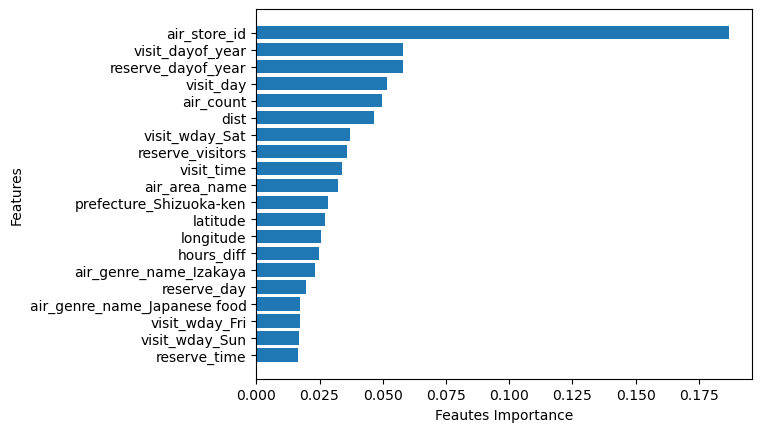

In [49]:
plot_features(X.columns, rfmod.feature_importances_);

### Variable Selection using Gradient Boosting regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

gbmod = GradientBoostingRegressor().fit(X, y)

In [51]:
model = SelectFromModel(gbmod, prefit=True)
model.get_support()

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [52]:
varSel['GradientBoost'] = model.get_support().astype('int64')
varSel

,Variable,Lasso,RandomForest,GradientBoost
0,air_store_id,1,1,1
1,air_area_name,1,1,1
2,latitude,1,1,1
3,longitude,1,1,1
4,reserve_visitors,1,1,1
...,...,...,...,...
81,dist_group_1,0,0,0
82,dist_group_2,0,0,0
83,dist_group_3,1,0,0
84,dist_group_4,1,0,0


### Variable Selection using LinearSVR

In [53]:
from sklearn.svm import LinearSVR

svmmod = LinearSVR().fit(X, y)

C:\Users\stein\Documents\DataScience\Restaurant_Project\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
model = SelectFromModel(svmmod, prefit=True)
model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True])

In [55]:
varSel['SVR'] = model.get_support().astype('int64')
varSel

,Variable,Lasso,RandomForest,GradientBoost,SVR
0,air_store_id,1,1,1,0
1,air_area_name,1,1,1,0
2,latitude,1,1,1,0
3,longitude,1,1,1,0
4,reserve_visitors,1,1,1,0
...,...,...,...,...,...
81,dist_group_1,0,0,0,1
82,dist_group_2,0,0,0,1
83,dist_group_3,1,0,0,1
84,dist_group_4,1,0,0,1


## Filter method using the SelectKBest

In [56]:
from sklearn.feature_selection import SelectKBest, f_regression

In [57]:
skb = SelectKBest(score_func = f_regression).fit(X, y)

In [58]:
selected_features = skb.get_support()

In [59]:
selected_features

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False])

In [60]:
varSel['SKB'] = skb.get_support().astype('int64')
varSel

,Variable,Lasso,RandomForest,GradientBoost,SVR,SKB
0,air_store_id,1,1,1,0,0
1,air_area_name,1,1,1,0,0
2,latitude,1,1,1,0,0
3,longitude,1,1,1,0,0
4,reserve_visitors,1,1,1,0,1
...,...,...,...,...,...,...
81,dist_group_1,0,0,0,1,1
82,dist_group_2,0,0,0,1,1
83,dist_group_3,1,0,0,1,0
84,dist_group_4,1,0,0,1,0


## Recursive Feature Elimination (RFE)

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a linear regression model
lrmod = LinearRegression()

# create an RFE object
rfe = RFE(estimator=lrmod, step=1)

# fit the RFE object to the data
rfe.fit(X, y)

# get the support mask (i.e., which features were selected)
support = rfe.support_

# add the selected features to the dictionary
varSel['RFE'] = support.astype('int64')


In [62]:
varSel

,Variable,Lasso,RandomForest,GradientBoost,SVR,SKB,RFE
0,air_store_id,1,1,1,0,0,0
1,air_area_name,1,1,1,0,0,0
2,latitude,1,1,1,0,0,0
3,longitude,1,1,1,0,0,0
4,reserve_visitors,1,1,1,0,1,0
...,...,...,...,...,...,...,...
81,dist_group_1,0,0,0,1,1,1
82,dist_group_2,0,0,0,1,1,1
83,dist_group_3,1,0,0,1,0,1
84,dist_group_4,1,0,0,1,0,1


### Summarization and Selection of Variables 

In [63]:
varSel['Sum'] =  np.sum(varSel,axis=1)


C:\Users\stein\Documents\DataScience\Restaurant_Project\env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


In [64]:
varSel.head(20)

,Variable,Lasso,RandomForest,GradientBoost,SVR,SKB,RFE,Sum
0,air_store_id,1,1,1,0,0,0,3
1,air_area_name,1,1,1,0,0,0,3
2,latitude,1,1,1,0,0,0,3
3,longitude,1,1,1,0,0,0,3
4,reserve_visitors,1,1,1,0,1,0,4
5,visit_day,1,1,0,0,0,0,2
6,visit_dayof_year,1,1,1,0,0,0,3
7,reserve_day,1,1,0,0,0,0,2
8,reserve_dayof_year,1,1,1,0,0,0,3
9,visit_time,1,1,1,0,0,0,3


In [65]:
varSel.groupby('Sum')['Variable'].count()

Sum
0     8
1    19
2    27
3    21
4     5
5     4
6     2
Name: Variable, dtype: int64

**We can now decide a threshold for selecting our variables!**

In [66]:
varSel[varSel['Sum']==1]

,Variable,Lasso,RandomForest,GradientBoost,SVR,SKB,RFE,Sum
24,air_genre_name_Okonomiyaki/Monja/Teppanyaki,1,0,0,0,0,0,1
39,visit_month_1,0,0,0,0,0,1,1
42,visit_month_4,0,0,0,0,0,1,1
44,visit_month_6,0,0,0,0,0,1,1
45,visit_month_7,0,0,0,0,0,1,1
49,visit_month_11,0,0,0,0,0,1,1
59,visit_year_2017,0,0,0,0,0,1,1
60,reserve_month_1,1,0,0,0,0,0,1
61,reserve_month_2,1,0,0,0,0,0,1
62,reserve_month_3,1,0,0,0,0,0,1


In [67]:
varSel[varSel['Sum']==0]

,Variable,Lasso,RandomForest,GradientBoost,SVR,SKB,RFE,Sum
14,air_genre_name_Asian,0,0,0,0,0,0,0
18,air_genre_name_Dining bar,0,0,0,0,0,0,0
19,air_genre_name_International cuisine,0,0,0,0,0,0,0
64,reserve_month_5,0,0,0,0,0,0,0
65,reserve_month_6,0,0,0,0,0,0,0
74,reserve_wday_3,0,0,0,0,0,0,0
75,reserve_wday_4,0,0,0,0,0,0,0
76,reserve_wday_5,0,0,0,0,0,0,0


**We will remove the variables with Sum = 1 or 0**

In [68]:
# extract column names from data
cols_to_drop = list(varSel.loc[(varSel['Sum']== 1) | (varSel['Sum']== 0), 'Variable'])

# drop columns from df1 that exist in cols_to_drop
data.drop(cols_to_drop, axis=1, inplace=True)


# Model Selection
Lets see which Model performs the best on the training and validation sets using our custom Evaluation function.

### Split the full dataset into test set and save it 
The test set is the last 10% of the full dataset.

In [69]:
# Calculate the number of rows in the dataframe
num_rows = data.shape[0]

# Calculate the number of rows to select for the last 10%
num_rows_last_10_percent = int(num_rows * 0.1)

# Select the last 10% of the rows using the tail() method
df_test = data.tail(num_rows_last_10_percent)

# Save the selected rows to a CSV file
df_test.to_csv("data/test_data.csv", index=False)

In [70]:
# Select the remaining 90% of the rows using the iloc() method
data = data.iloc[:num_rows - num_rows_last_10_percent]

In [71]:
# print the shapes of the train and test sets
print('Train set shape:', data.shape)
print('Test set shape:', df_test.shape)

Train set shape: (97596, 60)
Test set shape: (10843, 60)


In [72]:
#to save memory and not to confuse
del df_test

### Splitting the data into train/validation sets.
We cannot shuffle a time-series data since its time dependant and can create unwanted biases.
**Note: here we refer to the validation set as "test set"**

In [74]:
from sklearn.model_selection import train_test_split #we won't be using this function


# split the data into training and testing sets, the last 20% of the data will go to evalutation(test here)
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]


# Split data into X and y
X_train, y_train = train_data.drop("visitors", axis=1), train_data["visitors"]
X_test, y_test = test_data.drop("visitors", axis=1), test_data["visitors"]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78076, 59), (78076,), (19520, 59), (19520,))

### Building an evaluation function

In [76]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates RMSLE 
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on few diff levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE" :mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE":rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores

## LinearRegression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
# set random seed 
np.random.seed(42)

# train model
model = LinearRegression()
model.fit(X_train, y_train)
    
# make predictions on test set
y_pred = model.predict(X_test)
    
# evaluate model
show_scores(model)


{'Training MAE': 13.569132438295462,
 'Valid MAE': 13.572854985756512,
 'Training RMSLE': 0.6084280608047978,
 'Valid RMSLE': 0.5847945606673357,
 'Training R^2': 0.222769595325357,
 'Valid R^2': 0.18382948239641472}

In [79]:
rmsle(y_test, y_pred)

0.5847945606673357

<Axes: xlabel='y_test', ylabel='y_pred'>

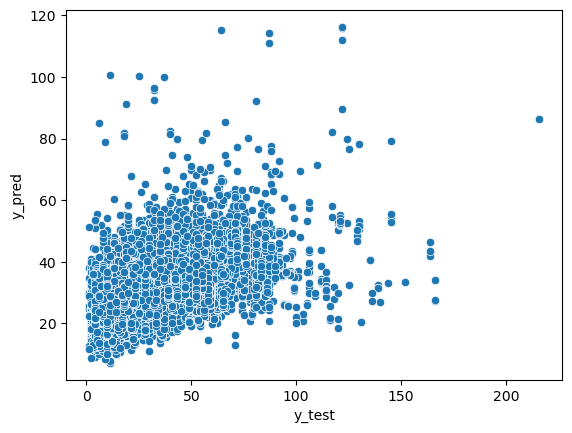

In [81]:
# concatenate y_test and y_pred into a single dataframe
df2 = pd.concat([y_test, pd.Series(y_pred, index=y_test.index)], axis=1)
df2.columns = ['y_test', 'y_pred']
# plot the predicted vs actual values using Seaborn
sns.scatterplot(data=df2, x='y_test', y='y_pred')

## RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
model = RandomForestRegressor(n_jobs = -1, random_state = 40)

In [84]:
%%time 

model.fit(X_train, y_train)

CPU times: total: 3min 2s
Wall time: 24.5 s


RandomForestRegressor(n_jobs=-1, random_state=40)

In [85]:
# make predictions on test set
y_pred = model.predict(X_test)
    
# evaluate model on test set (we cant use RMSLE sicne y_preds have a negative value)
show_scores(model)

{'Training MAE': 1.634626773912598,
 'Valid MAE': 10.310728995901641,
 'Training RMSLE': 0.15390620554597806,
 'Valid RMSLE': 0.47691107052114473,
 'Training R^2': 0.9808855424181373,
 'Valid R^2': 0.3995862953036361}

<Axes: xlabel='y_test', ylabel='y_pred'>

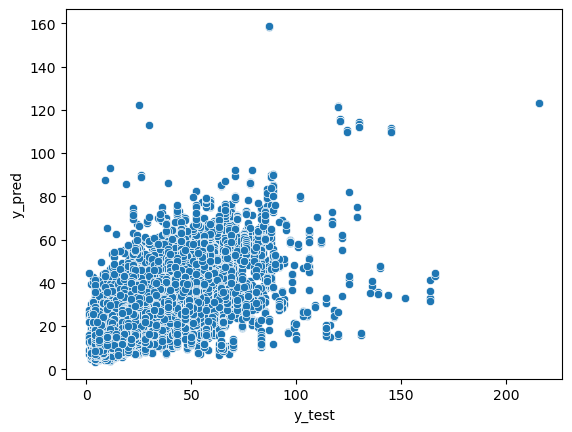

In [87]:
# concatenate y_test and y_pred into a single dataframe
df2 = pd.concat([y_test, pd.Series(y_pred, index=y_test.index)], axis=1)
df2.columns = ['y_test', 'y_pred']
# plot the predicted vs actual values using Seaborn
sns.scatterplot(data=df2, x='y_test', y='y_pred')

## GradientBoostingRegressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
# set random seed 
np.random.seed(42)

# train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
    
# make predictions on test set
y_pred = model.predict(X_test)
    
# evaluate model on validation set
show_scores(model)

{'Training MAE': 11.565197625929674,
 'Valid MAE': 12.546189969415327,
 'Training RMSLE': 0.5451949328745695,
 'Valid RMSLE': 0.5485526622884943,
 'Training R^2': 0.4411587577459585,
 'Valid R^2': 0.2462795577475848}

<Axes: xlabel='y_test', ylabel='y_pred'>

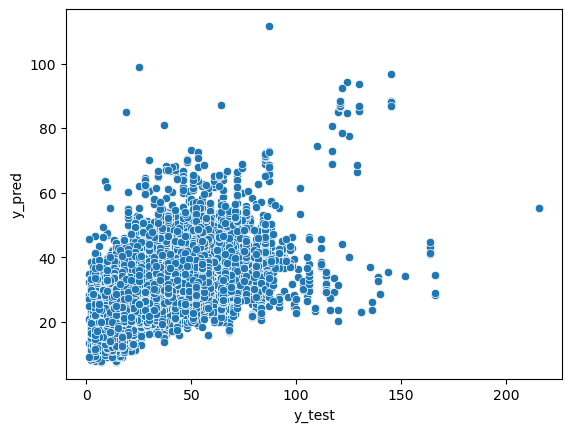

In [91]:
# concatenate y_test and y_pred into a single dataframe
df2 = pd.concat([y_test, pd.Series(y_pred, index=y_test.index)], axis=1)
df2.columns = ['y_test', 'y_pred']
# plot the predicted vs actual values using Seaborn
sns.scatterplot(data=df2, x='y_test', y='y_pred')

## SGDRegressor
SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [92]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# set random seed
np.random.seed(42)

# create pipeline with StandardScaler and SGDRegressor
model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

# evaluate model on test set
show_scores(model)


{'Training MAE': 13.57229250239168,
 'Valid MAE': 13.481551195801567,
 'Training RMSLE': 0.6092609240911927,
 'Valid RMSLE': 0.5788271159884255,
 'Training R^2': 0.214121838831559,
 'Valid R^2': 0.16871477543814106}

<Axes: xlabel='y_test', ylabel='y_pred'>

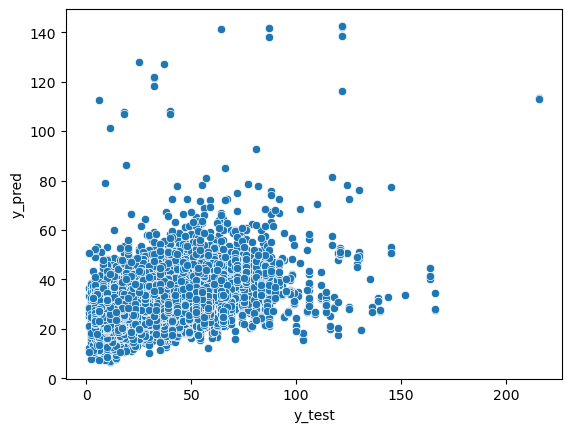

In [95]:
# concatenate y_test and y_pred into a single dataframe
df2 = pd.concat([y_test, pd.Series(y_pred, index=y_test.index)], axis=1)
df2.columns = ['y_test', 'y_pred']
# plot the predicted vs actual values using Seaborn
sns.scatterplot(data=df2, x='y_test', y='y_pred')

# Model - XGBoost

In [96]:
import xgboost as xgb

C:\Users\stein\Documents\DataScience\Restaurant_Project\env\lib\site-packages\xgboost\compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [97]:
# create an xgboost regression model
# Instantiation
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [98]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[13:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [99]:
# make predictions on test set
y_pred = xgb_r.predict(X_test)

# evaluate model on test set
show_scores(xgb_r)

{'Training MAE': 10.874403825420124,
 'Valid MAE': 12.226629927729974,
 'Training RMSLE': 0.5196935873773632,
 'Valid RMSLE': 0.5306975783182367,
 'Training R^2': 0.5061165898611171,
 'Valid R^2': 0.26889233741432106}

## RandomForestRegressor with  StandardScaler

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# set random seed
np.random.seed(40)

# create pipeline with StandardScaler and SGDRegressor
model = make_pipeline(StandardScaler(), RandomForestRegressor())

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

# evaluate model on test set
show_scores(model)

{'Training MAE': 1.6349392899226396,
 'Valid MAE': 10.307632172131147,
 'Training RMSLE': 0.1539385835076248,
 'Valid RMSLE': 0.47703036440868046,
 'Training R^2': 0.9808710691500202,
 'Valid R^2': 0.4001394647398925}

**The best model with the lowest RSMLE is RandomForestRegressor (without Scaling). We will continue with this model and fine-tune it using Cross-Validation**

# Hyperparameters Tuning with RandomizedSearchCV

In [101]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [3,5,10,15,20,25,30]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


# Note - the next code will run for 10 minutes

In [100]:
%%time

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(n_jobs = -1, random_state = 40)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, 
                               verbose=2, random_state=40, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\stein\Documents\DataScience\Restaurant_Project\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 9min 11s
Wall time: 6min 45s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, verbose=2)

In [101]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",rf_random.best_estimator_)
print("\n The best score across ALL searched params:\n",rf_random.best_score_)
print("\n The best parameters across ALL searched params:\n",rf_random.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=30, max_features='auto', min_samples_split=5,
                      n_estimators=282, n_jobs=-1, random_state=123)

 The best score across ALL searched params:
 0.4415147074392758

 The best parameters across ALL searched params:
 {'n_estimators': 282, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


### Train a model with the best hyperparams

**Note:** this were found after iterations of RandomizedSearchCV

In [102]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators= 282, 
                                    min_samples_split= 5,
                                    min_samples_leaf= 1,
                                    max_features= 'auto',
                                    max_depth= 30,
                                    bootstrap= True,
                                    random_state = 40,
                                    n_jobs = -1)

# fit the ideal model
ideal_model.fit(X_train, y_train)

C:\Users\stein\Documents\DataScience\Restaurant_Project\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 8min 7s
Wall time: 1min 10s


RandomForestRegressor(max_depth=30, max_features='auto', min_samples_split=5,
                      n_estimators=282, n_jobs=-1, random_state=40)

In [103]:
show_scores(ideal_model)

{'Training MAE': 2.0939408394180923,
 'Valid MAE': 10.252798311044902,
 'Training RMSLE': 0.18685878373655607,
 'Valid RMSLE': 0.4716097329360674,
 'Training R^2': 0.9697616389607229,
 'Valid R^2': 0.40714203267611604}

The scores before RandomSearchCV:
{'Training MAE': 1.634626773912598,
 'Valid MAE': 10.310728995901641,
 'Training RMSLE': 0.15390620554597806,
 'Valid RMSLE': 0.47691107052114473,
 'Training R^2': 0.9808855424181373,
 'Valid R^2': 0.3995862953036361}
 
 **We can see a little imporvement**

# Final Step - Make predictions on test data


In [104]:
#import the test data
df_test = pd.read_csv("data/test_data.csv", low_memory = False)

In [105]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,10833,10834,10835,10836,10837,10838,10839,10840,10841,10842
air_store_id,19.000000,36.000000,19.000000,20.000000,36.000000,36.000000,35.000000,34.000000,34.000000,34.000000,...,110.000000,110.000000,110.000000,111.000000,111.000000,112.000000,112.000000,114.000000,107.000000,330.000000
visitors,31.000000,15.000000,31.000000,4.000000,15.000000,15.000000,9.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,40.000000,40.000000,36.000000,36.000000,64.000000,32.000000,14.000000
air_area_name,23.000000,19.000000,23.000000,41.000000,19.000000,19.000000,56.000000,56.000000,56.000000,56.000000,...,23.000000,23.000000,23.000000,1.000000,1.000000,39.000000,39.000000,15.000000,5.000000,31.000000
latitude,34.695124,43.056819,34.695124,35.671270,43.056819,43.056819,35.693840,35.693840,35.693840,35.693840,...,34.695124,34.695124,34.695124,33.589216,33.589216,35.743575,35.743575,43.770635,33.561569,34.710895
longitude,135.197853,141.353957,135.197853,139.796987,141.353957,141.353957,139.703549,139.703549,139.703549,139.703549,...,135.197853,135.197853,135.197853,130.392813,130.392813,139.847180,139.847180,142.364819,130.426428,137.725940
reserve_visitors,5.000000,2.000000,10.000000,3.000000,2.000000,3.000000,2.000000,5.000000,2.000000,3.000000,...,2.000000,2.000000,3.000000,5.000000,5.000000,2.000000,2.000000,11.000000,37.000000,2.000000
visit_day,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
visit_dayof_year,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
reserve_day,29.000000,29.000000,22.000000,27.000000,28.000000,29.000000,24.000000,29.000000,30.000000,30.000000,...,22.000000,20.000000,13.000000,20.000000,20.000000,22.000000,13.000000,8.000000,9.000000,22.000000
reserve_dayof_year,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000


**The Test dataset must be the same format as the model was trained on.Since we preprocessed the data and then splitted to train val and test sets, there's no need to preprocess it for model predcition.**


In [106]:
# we can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

Split the test data to X and y for final model evaluation

In [107]:
X_test, y_test = df_test.drop("visitors", axis=1), df_test["visitors"]

In [108]:
test_preds = ideal_model.predict(X_test)

In [110]:
show_scores(ideal_model)

{'Training MAE': 2.0939408394180923,
 'Valid MAE': 10.387427683475304,
 'Training RMSLE': 0.18685878373655607,
 'Valid RMSLE': 0.4940353973186133,
 'Training R^2': 0.9697616389607229,
 'Valid R^2': 0.35864507019467495}

# Feature importance

In [111]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.19327116, 0.03429653, 0.02757552, 0.02502283, 0.03911463,
       0.05019093, 0.06999788, 0.02148713, 0.06767244, 0.04120048,
       0.01750441, 0.02810393, 0.04424155, 0.05001599, 0.00319195,
       0.00651877, 0.00539734, 0.01832279, 0.02582116, 0.01211575,
       0.01595496, 0.00096659, 0.00505328, 0.00531916, 0.00089083,
       0.00351927, 0.00074391, 0.00195182, 0.00073882, 0.00078797,
       0.0388776 , 0.0018676 , 0.00062385, 0.00547679, 0.0056212 ,
       0.00478727, 0.00522458, 0.00255646, 0.00102006, 0.0014781 ,
       0.00152123, 0.00161015, 0.01652055, 0.00541366, 0.03755459,
       0.01551113, 0.00405326, 0.00365022, 0.0038199 , 0.00542124,
       0.0008425 , 0.00251219, 0.00250169, 0.00130044, 0.00205724,
       0.00116941, 0.0033335 , 0.00358584, 0.00309797])

In [112]:
len(ideal_model.feature_importances_)

59

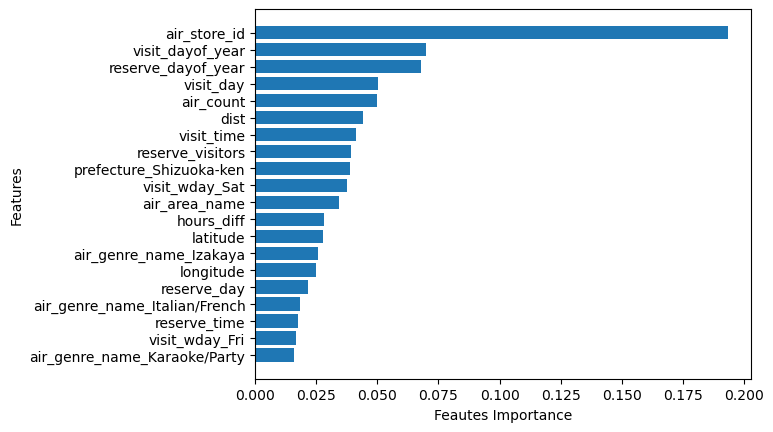

In [113]:
plot_features(X_train.columns, ideal_model.feature_importances_)

feature_importances_ is a method that is used to calculate the relative importance of each feature used in a machine learning model. It works by analyzing how much each feature contributes to the model's accuracy in making predictions.
The calculation of feature importances depends on the specific algorithm used to train the model. For example, in a decision tree-based algorithm like Random Forest, feature importances are calculated based on how much a feature contributes to reducing the impurity of the splits in the decision trees. In other algorithms like linear regression, feature importances are calculated based on the magnitude of the coefficient assigned to each feature.


**End of Notebook**

After training and fine-tuning the Random Forest Regressor model, we have obtained three different sets of results. The initial results show that the model performed well during training with a training R^2 value of 0.98, indicating that the model explains 98% of the variance in the training data. However, the model's performance on the validation data was not as good, with an RMSLE of 0.48 and a R^2 of 0.40. These results suggest that the model may be overfitting the training data.

After fine-tuning the hyperparameters of the model, the performance on the validation set improved slightly, with a decrease in the RMSLE value to 0.47 and an increase in R^2 value to 0.41. These changes may not seem significant, but they can lead to more accurate predictions and better insights into the data.

The final results on the test data set show that the model's performance is relatively consistent with the validation set, indicating that the model is not overfitting. The RMSLE value of 0.49 and R^2 value of 0.36 indicate that the model is not explaining as much variance in the data as we would like. However, these results are still useful in making predictions and providing insights into the data.

**In conclusion,** the Random Forest Regressor model performs reasonably well in predicting the number of visitors to the restaurant. While the performance could be improved, the model can still provide useful insights into the data and can be used to make accurate predictions. Further improvements to the model may be made by collecting more data or exploring different algorithms to see if they can better capture the complexities of the data. Overall, the results of this project demonstrate the potential for machine learning models to improve restaurant management and sustainability.